In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn import tree

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, min_samples_leaf=1,
                               min_impurity_decrease=0.05)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.05,
                       min_samples_split=20)

[Text(0.5, 0.8333333333333334, 'x[27] <= 0.142\nentropy = 0.945\nsamples = 455\nvalue = [165, 290]'),
 Text(0.25, 0.5, 'x[22] <= 107.75\nentropy = 0.399\nsamples = 303\nvalue = [24, 279]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.133\nsamples = 269\nvalue = [5, 264]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.99\nsamples = 34\nvalue = [19, 15]'),
 Text(0.75, 0.5, 'x[22] <= 112.8\nentropy = 0.375\nsamples = 152\nvalue = [141, 11]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.948\nsamples = 30\nvalue = [19, 11]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 122\nvalue = [122, 0]')]

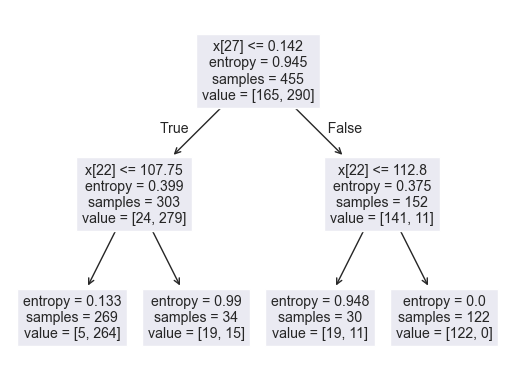

In [25]:
tree.plot_tree(model)

In [26]:
y_pre = model.predict(X_test)
confusion_matrix(y_test, y_pre)

array([[46,  1],
       [ 8, 59]], dtype=int64)

In [27]:
index = model.feature_importances_
index

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24094234, 0.        , 0.        ,
       0.        , 0.        , 0.75905766, 0.        , 0.        ])

## Decision Tree Pruning Effect

In [29]:
# Compute the cost complexity path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs. Effective Alpha for Training Set')

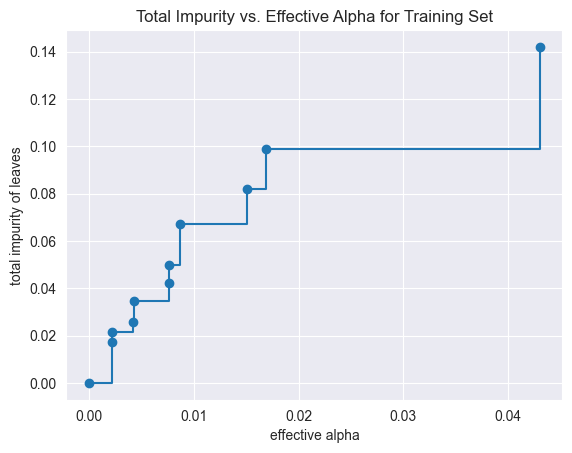

In [30]:
# Plot total impurity vs. effective alpha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs. Effective Alpha for Training Set")


1) Number of nodes in the last tree: 43 | ccp_alpha: 0.32027199074911666 | train_accuracy: 1.0 | test_accuracy: 0.9122807017543859
2) Number of nodes in the last tree: 27 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.9912087912087912 | test_accuracy: 0.9473684210526315
3) Number of nodes in the last tree: 23 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.989010989010989 | test_accuracy: 0.9473684210526315
4) Number of nodes in the last tree: 21 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.9868131868131869 | test_accuracy: 0.9473684210526315
5) Number of nodes in the last tree: 17 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.9824175824175824 | test_accuracy: 0.9473684210526315
6) Number of nodes in the last tree: 13 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.9736263736263736 | test_accuracy: 0.9649122807017544
7) Number of nodes in the last tree: 13 | ccp_alpha: 0.32027199074911666 | train_accuracy: 0.9736263736263736 | test_accuracy: 0.96491228070

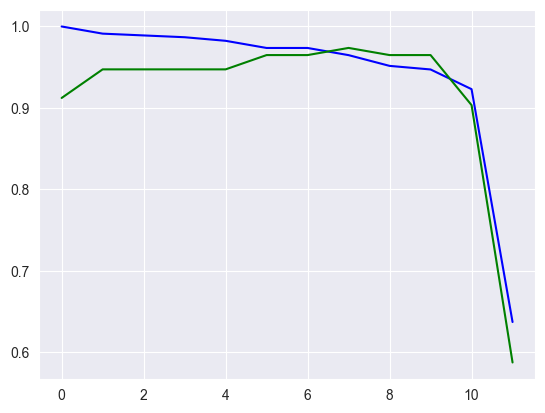

In [47]:
# Train decision trees using effective alphas
clfs = []
train_accuracies = []
test_accuracies = []
i = 0
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))
    i += 1
    # Print number of nodes in the last tree
    print(
        f"{i}) Number of nodes in the last tree: {clfs[-1].tree_.node_count} | ccp_alpha: {ccp_alphas[-1]} | train_accuracy: {clf.score(X_train, y_train)} | test_accuracy: {clf.score(X_test, y_test)}")

plt.plot(train_accuracies, 'b')
plt.plot(test_accuracies, 'g')
plt.show()

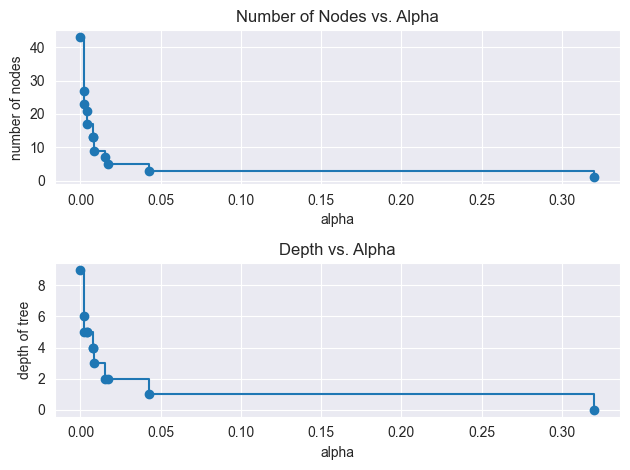

In [48]:
# Plot number of nodes vs. alpha and depth vs. alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs. Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs. Alpha")
fig.tight_layout()

In [50]:
best_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.32027199074911666)
best_model.fit(X_train, y_train)
y_pre = best_model.predict(X_test)
confusion_matrix(y_test, y_pre)

array([[48,  5],
       [12, 78]], dtype=int64)